In [38]:
%pylab inline
import healpy as hp
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:100% !important; }</style>"))


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [824]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, scale_radius=2):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
#             circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4., color='w', ec='k', zorder=4)
#             ax.add_artist(circle)
            ellipse = Ellipse(xy=(n*h_spacing + left, layer_top - m*v_spacing), width=v_spacing/2.*scale_radius, height=v_spacing/4.*scale_radius, color='w', ec='k', zorder=4)
            ax.add_artist(ellipse)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left], [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
    ax.axis('off')


In [899]:
def make_ball(map_test1, cmap=cm.gray_r):
    cmap.set_under('w')
    dot_size=10
    rot = (0,30,345)
    vmin, vmax = -0.5, 1.5

    map_test1_bw = map_test1.astype(np.float)/np.max(map_test1);
    hp.visufunc.orthview(map=map_test1_bw, half_sky=True, title='', rot=rot, cmap=cmap, cbar=False, hold=True, nest=True, min=vmin, max=vmax, notext=True);
    theta, phi = hp.pix2ang(hp.npix2nside(len(map_test1)), range(len(map_test1)), nest=True);
    hp.projscatter(theta, phi, c='k', s=dot_size);
    hp.graticule();
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,15), local=True);
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,195), local=True);       
#     pl.savefig('test_fig1.pdf', bbox_inches='tight', transparent=True);

In [130]:
def add_dots_vertical(args_scatter={}):
    
    dotsy = [1,2,3]
    dotsx = [2,2,2]
    pl.scatter(dotsx, dotsy, **args_scatter)
    pl.ylim(0,4)
    pl.xlim(0,4)
    pl.gca().axis('off')


In [127]:
def add_dots_horizontal(args_scatter={}):
    
    dotsx = [1,2,3]
    dotsy = [2,2,2]
    pl.scatter(dotsx, dotsy, **args_scatter)
    pl.ylim(0,4)
    pl.xlim(0,4)
    pl.gca().axis('off')


In [882]:
def add_random_filter(args_plot={}):
    
    x = np.linspace(-2,2, 100)
    coeffs = np.random.randn(6)*np.arange(1,7)[::-1]
    coeffs[1::2]=0
    print coeffs

    cheby=np.polynomial.chebyshev.Chebyshev(coeffs)
    y = np.exp(-x**2/2.)*cheby(x)
    pl.plot(x, y, **args_plot)


In [1010]:
def add_filter(coeffs, args_plot={}):
    
    x = np.linspace(-2,2, 100)

    cheby=np.polynomial.chebyshev.Chebyshev(coeffs)
    y = np.exp(-x**2/2.)*cheby(x)
    y -= np.min(y)
    y /= np.max(y)
    y *= 4
    y -= 2
    pl.plot(x, y, **args_plot)
    pl.margins(0.2, 0.2)
    c = 2*1.2
    pl.plot([-c, -c], [-c, c], c='k', lw=1)
    pl.plot([ c,  c], [-c, c], c='k', lw=1)
    pl.plot([-c,  c], [-c,-c], c='k', lw=1)
    pl.plot([ c, -c], [ c, c], c='k', lw=1)
    lim = 3.5
    pl.ylim(-3.5, 3.5)
    pl.xlim(-2.5, 3.5)
    lw = 4
    pl.plot([2.75, 3.5], [0.25, 0.25], c='k', lw=lw)
    pl.gca().axis('off')
    
    

In [1008]:
def add_connections(str_count='', prev_layer=False, main_layer=True, horizontal_dots=False, args_plot={}, args_scatter={}):
    
    lw = 4
    c = 1
    bc = -4
    bd = -3
    be = -2
    lvl1 = 7.75
    lvl2 = 2.75
    lvl3 = -7.5
    lvl4 = 0
    lvl5 = -5
    lvl6 = -0.25
    lvl7 = -4.75
    
    if main_layer:
        pl.plot([bc, -c], [lvl1, lvl1], c='k', lw=lw)   
        pl.plot([-c,  c], [lvl1, lvl1], c='k', lw=lw)
        pl.plot([-c,  c], [lvl2, lvl2], c='k', lw=lw)
        pl.plot([-c,  c], [lvl3, lvl3], c='k', lw=lw)
        pl.plot([-c, -c], [lvl1, lvl4], c='k', lw=lw)
        pl.plot([-c, -c], [lvl3, lvl5], c='k', lw=lw)
        pl.plot([-c, -c], [lvl6, lvl7], c='k', lw=2, ls=':')
        pl.text(s='0',            x=c-1.1, y=lvl1+0.5, fontsize=15)
        pl.text(s='1',            x=c-1.1, y=lvl2+0.5, fontsize=15)
        pl.text(s=str_count,      x=c-1.1, y=lvl3+0.5, fontsize=15)

    if prev_layer:
        pl.plot([bc,  bd], [lvl1, lvl1], c='k', lw=lw)
#         pl.plot([bc,  be], [lvl1, lvl1], c='k', lw=2, ls=':')       
        pl.plot([bc,  bd], [lvl2, lvl2], c='k', lw=lw)
        pl.plot([bc,  be], [lvl2, lvl2], c='k', lw=2, ls=':')
        pl.plot([bc,  bd], [lvl3, lvl3], c='k', lw=lw)
        pl.plot([bc,  be], [lvl3, lvl3], c='k', lw=2, ls=':')
        
    if horizontal_dots:
        dotsx = [-2+0.5,-1+0.5,0+0.5]
        dotsy = [lvl1,lvl1,lvl1]
        pl.scatter(dotsx, dotsy, **args_scatter)
    
    pl.ylim(-10,10)
    pl.xlim(bc,c)
    pl.gca().axis('off')



In [975]:
def add_remaining_connections():
    
    c = 1
    lw = 4
    bc = -4
    bd = -3
    be = -2
    lvl1 = 7.75
    lvl2 = 2.5
    lvl3 = -8
    pl.plot([bc,  bd], [lvl1, lvl1], c='k', lw=lw)
    pl.plot([bc,  be], [lvl1, lvl1], c='k', lw=2, ls=':')       
    pl.plot([bc,  bd], [lvl2, lvl2], c='k', lw=lw)
    pl.plot([bc,  be], [lvl2, lvl2], c='k', lw=2, ls=':')
    pl.plot([bc,  bd], [lvl3, lvl3], c='k', lw=lw)
    pl.plot([bc,  be], [lvl3, lvl3], c='k', lw=2, ls=':')

    pl.ylim(-10,10)
    pl.xlim(bc,c)
#     pl.gca().axis('off')


In [885]:
def add_text(text_str):
    
    pl.text(0.5, 0.5, text_str, horizontalalignment='center', verticalalignment='center', fontsize=25)
    pl.gca().axis('off')


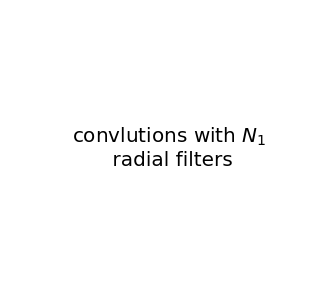

In [850]:
pl.figure(figsize=(5,5))
add_text("convlutions with $N_1$ \n radial filters")

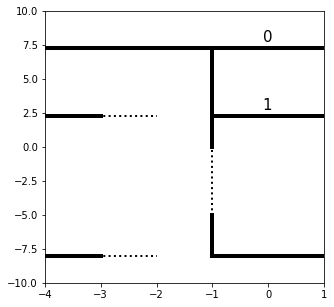

In [977]:
pl.figure(figsize=(5,5))
add_connections(prev_layer=True, main_layer=True)

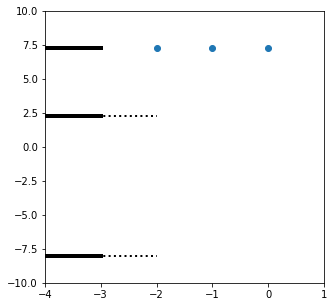

In [990]:
pl.figure(figsize=(5,5))
add_connections(prev_layer=True, main_layer=False, horizontal_dots=True)

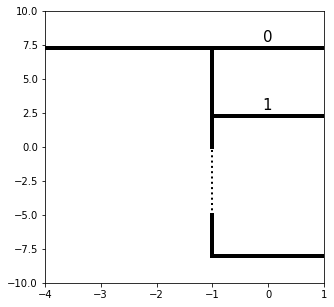

In [981]:
pl.figure(figsize=(5,5))
add_connections(prev_layer=False, main_layer=True)

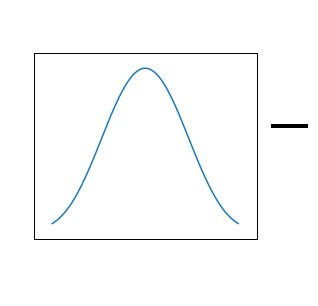

In [1006]:
pl.figure(figsize=(5,5))
add_filter(list_col_filters[0])

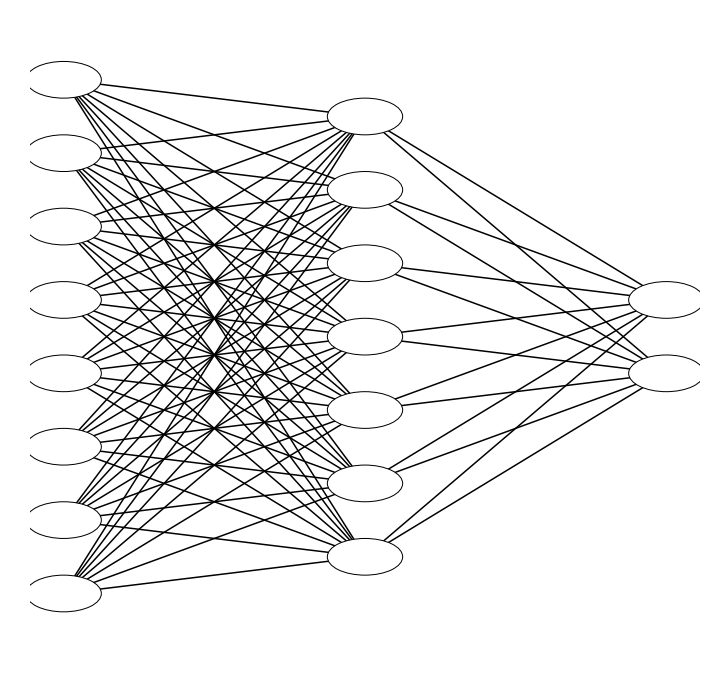

In [825]:
fig = plt.figure(figsize=(12, 12))
draw_neural_net(fig.gca(), .05, .95, .05, .95, [8, 7, 2])

In [906]:
npix = hp.nside2npix(16)
map_data = np.arange(npix)
# map_data = hp.read_map('/Users/tomek/notes/160223_advanced_stats_methods/ASM_2017/ASM/Lectures/CMB/COM_CMB_IQU-smica_1024_R2.02_full.fits')
# map_data = hp.ud_grade(map_data, nside_out=16).astype(np.float32)
# map_data -= np.min(map_data)
# map_data /= np.max(map_data)

npix = hp.nside2npix(4)
map_test1 = np.arange(npix)
npix = hp.nside2npix(2)
map_test2 = np.arange(npix)
npix = hp.nside2npix(1)
map_test3 = np.arange(npix)
list_col_maps = [map_test1, map_test2, map_test3]

In [636]:
list_col_filters = [None]*9
list_col_filters[0] = np.array([ 11.25365034,   0.,   -1.18938064,   0.,   -0.05086713, 0. ])
list_col_filters[1] = np.array([-9.78160805 ,   0.,   -1.42653875,   0.,   -1.38142099, 0. ])
list_col_filters[2] = np.array([-18.02216716,   0.,   0.94142343 ,   0.,   -0.84953354, 0. ])
list_col_filters[3] = np.array([-0.66255557 ,   0.,   -0.69860735,   0.,   -0.4712247 , 0. ])
list_col_filters[4] = np.array([-1.04785434 ,   0.,   -0.88448022,   0.,   -0.0026601 , 0. ])
list_col_filters[5] = np.array([ 0.43662062 ,   0.,   -1.45210374,   0.,   -1.74437622, 0. ])
list_col_filters[6] = np.array([ 2.25798642 ,   0.,   -5.75147804,   0.,   -1.29044244, 0. ])
list_col_filters[7] = np.array([ 4.52246711 ,   0.,   6.6445827  ,   0.,   -1.43355173, 0. ])
list_col_filters[8] = np.array([ 9.21127193 ,   0.,   -1.05796129,   0.,   -0.87348753, 0. ])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

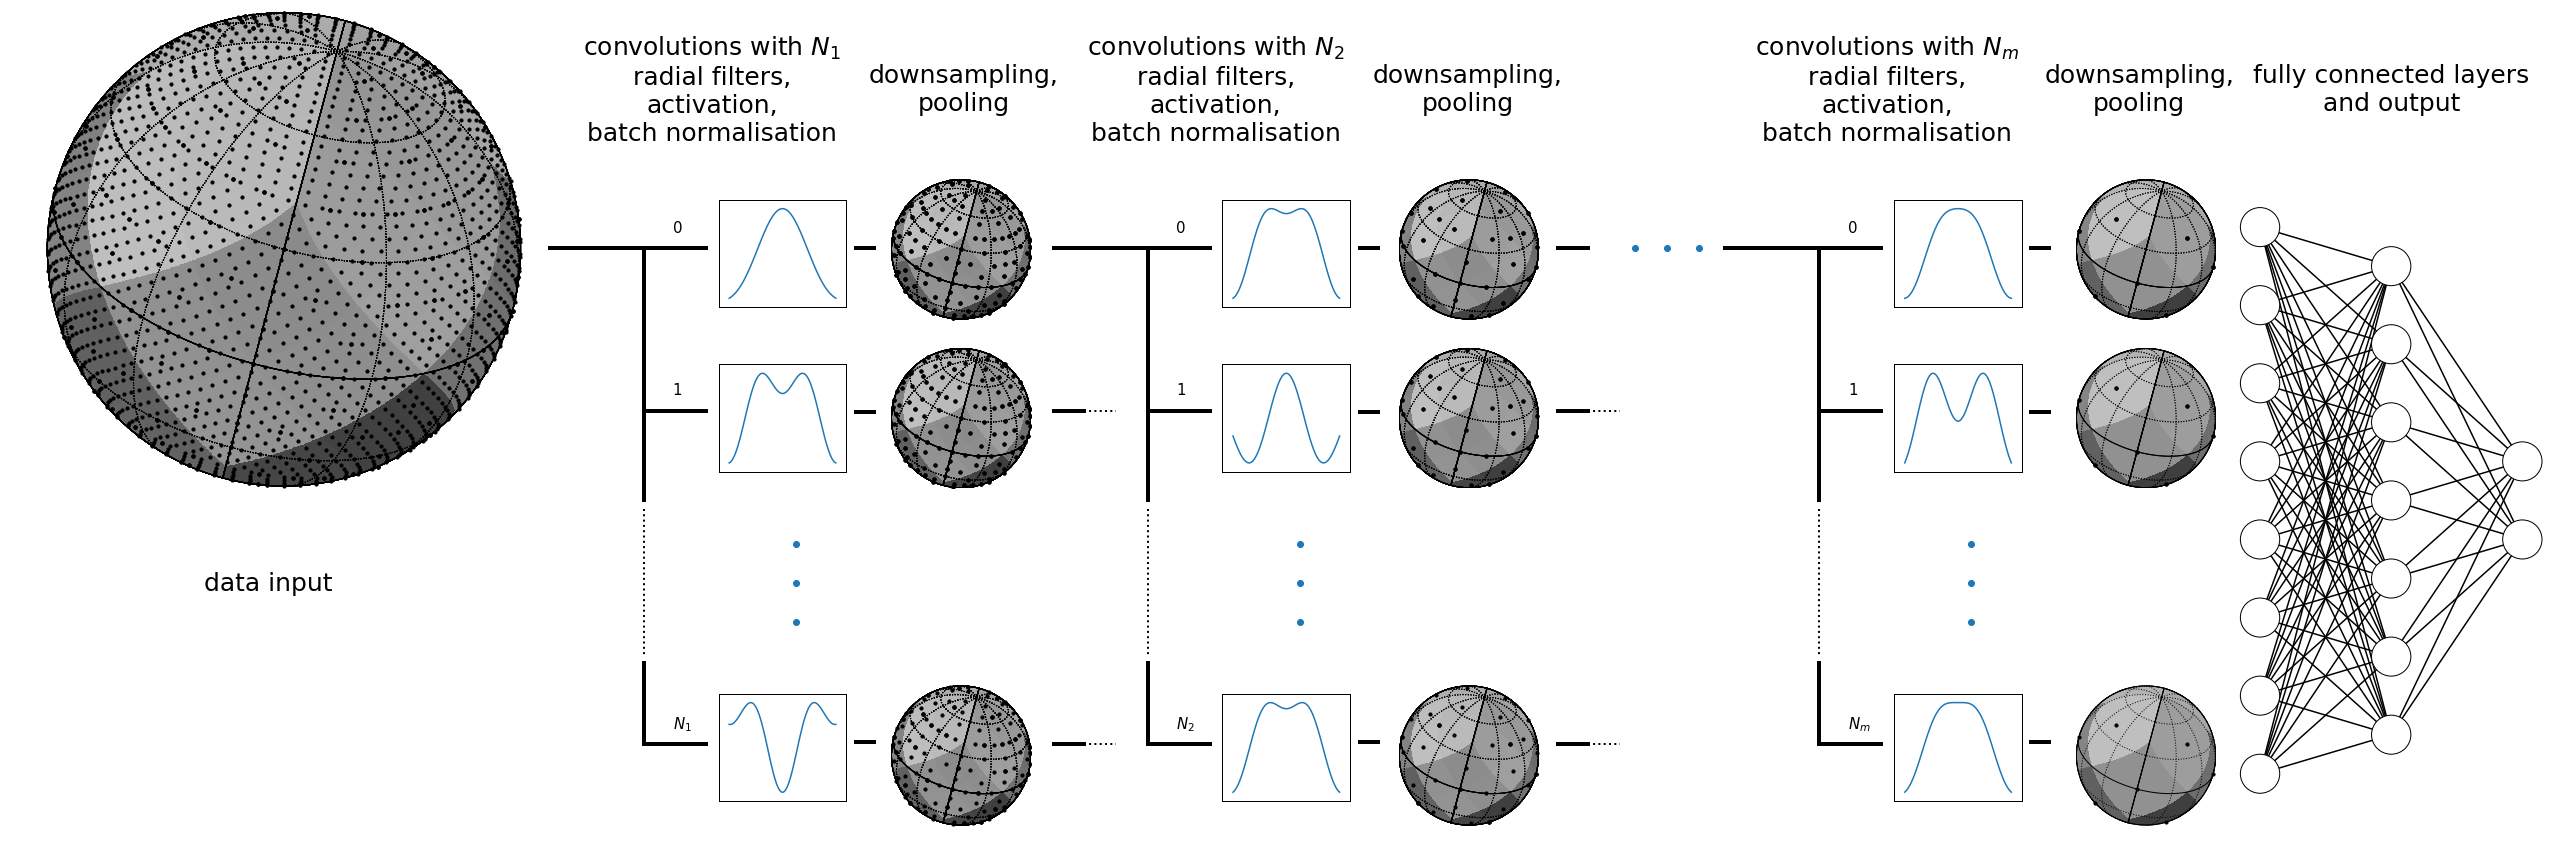

In [1011]:
import matplotlib.gridspec as gridspec

nr, nc, psr, psc = 5, 15, 3, 3

pl.figure(figsize=(nc*psc,nr*psr))
gs = gridspec.GridSpec(nr, nc)

# real data axis
ax1 = plt.subplot(gs[:3, :3])
plt.axes(ax1)
make_ball(map_data)

dr=1
# first connections
icol = 3
ax = plt.subplot(gs[dr:, icol])
add_connections(str_count='$N_1$')

# first row of filters
icol = 4
ax = plt.subplot(gs[0+dr, icol])
add_filter(list_col_filters[0])
ax = plt.subplot(gs[1+dr, icol])
add_filter(list_col_filters[1])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
add_filter(list_col_filters[2])

# first row of balls
icol, imap = 5, 0
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[2, icol])
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])

# space for connetions
icol = 6
ax = plt.subplot(gs[dr:, icol])
add_connections(str_count='$N_2$', prev_layer=True)

# second row of filters
icol = 7
ax = plt.subplot(gs[0+dr, icol])
add_filter(list_col_filters[3])
ax = plt.subplot(gs[1+dr, icol])
add_filter(list_col_filters[4])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
add_filter(list_col_filters[5])

# second row of balls
icol, imap = 8, 1
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[2, icol])
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])

# col dots
icol = 9
ax = plt.subplot(gs[dr:, icol])
# add_dots_horizontal()
# add_remaining_connections()
add_connections(str_count='$N_m$', prev_layer=True, main_layer=False, horizontal_dots=True)

# space for connetions
icol = 10
ax = plt.subplot(gs[dr:, icol])
add_connections(str_count='$N_m$', prev_layer=False)


# third row of filters
icol = 11
ax = plt.subplot(gs[0+dr, icol])
add_filter(list_col_filters[6])
ax = plt.subplot(gs[1+dr, icol])
add_filter(list_col_filters[7])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
add_filter(list_col_filters[8])

# third row of balls
icol, imap = 12, 2
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[2, icol])
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])

icol=13
ax = plt.subplot(gs[dr:, icol:])
draw_neural_net(ax, left=.1, right=.9, bottom=.02, top=.98, layer_sizes=[8, 7, 2])

# text
ax = plt.subplot(gs[0, 3:5])
add_text(text_str='convolutions with $N_1$\nradial filters,\nactivation,\nbatch normalisation')
ax = plt.subplot(gs[0, 5])
add_text(text_str='downsampling,\npooling')

ax = plt.subplot(gs[0, 6:8])
add_text(text_str='convolutions with $N_2$\nradial filters,\nactivation,\nbatch normalisation')

ax = plt.subplot(gs[0, 8])
add_text(text_str='downsampling,\npooling')

ax = plt.subplot(gs[0, 10:12])
add_text(text_str='convolutions with $N_m$\nradial filters,\nactivation,\nbatch normalisation')

ax = plt.subplot(gs[0, 12])
add_text(text_str='downsampling,\npooling')

ax = plt.subplot(gs[0, 13:])
add_text(text_str='fully connected layers\nand output')

ax = plt.subplot(gs[3, :3])  
add_text(text_str='data input      ')


plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figure_architecture.pdf', bbox_inches='tight')